In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
from pprint import pprint
from dotenv import load_dotenv
from tqdm import tqdm
from pathlib import Path

from langchain_core.messages import (
    SystemMessage,
    HumanMessage,
    AIMessage,
    RemoveMessage,
    ToolMessage
)
from langgraph.types import Command


root_dir = Path(os.getcwd()).parent.parent
sys.path.insert(0, str(root_dir))
load_dotenv(f'{root_dir}/.env')



True

In [2]:
from src.d01_data.graph import graph

raw_path = root_dir / 'data' / '01_raw'
intermediate_path = root_dir / 'data' / '02_intermediate'
memories_path = root_dir / 'data' / '03_memories'
output_path = root_dir / 'data' / '04_model_output'

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


The index chatbot-leyes already exists


In [3]:
# import sqlite3
# from src.d01_data.data import create_usuarios_table, get_user_info, upsert_user

# long_term_db_path = memories_path / 'long_term_memory.db'
# long_term_db_conn = sqlite3.connect(str(long_term_db_path), check_same_thread=False)
# create_usuarios_table(long_term_db_conn)

# # Example usage:
# user_info = get_user_info(long_term_db_conn, 3)
# print("User Info:", user_info)

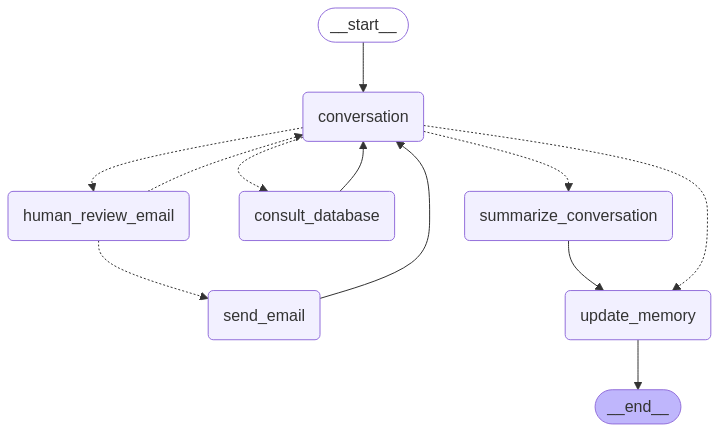

In [4]:
graph

In [5]:
user_id = 'edgar'
config = {'configurable': {'thread_id':user_id, 'user_id':user_id}}

In [6]:
graph.get_state(config).config

{'configurable': {'thread_id': 'edgar',
  'checkpoint_ns': '',
  'checkpoint_id': '1f00570b-2c0e-6c8d-8014-f4cf40cf1cd5'}}

In [7]:
graph.get_state(config).values['messages']

[HumanMessage(content='Hola en que me puedes ayudar? Sabes mi nombre?', additional_kwargs={}, response_metadata={}, id='b07d8306-2f82-4d2c-b144-28609f1bba11'),
 AIMessage(content='Hola, soy un asistente jurídico especializado en las leyes de España. Puedo ayudarte a encontrar información en la Constitución Española, el Código Civil y el Código Penal.\n\nNo tengo acceso a tu nombre ni a tu información personal. Para poder ayudarte, necesito que me indiques qué tipo de información legal necesitas. Por ejemplo, puedes preguntarme sobre un artículo específico de una ley, un concepto legal o un tema jurídico en particular.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-882ebc99-4b02-4c3b-b928-7f20c96c0ec4-0', usage_metadata={'input_tokens': 826, 'output_tokens': 86, 'total_tokens': 912, 'input_token_details': {'cache_read': 0}}),
 ToolMessage(content='No hay nuevos datos persona

In [36]:
graph.get_state(config).values['messages'][-2].id

'run-b9e81a0f-8e2b-4258-a6e7-cef0117d180f-0'

{'configurable': {'thread_id': 'usuario1945',
  'checkpoint_ns': '',
  'checkpoint_id': '1efff2fd-18b4-6839-8013-60f3758391ea',
  'user_id': 'usuario1945'}}

In [ ]:
graph.invoke(None, 
{'configurable': {'thread_id': 'usuario1945',
  'checkpoint_ns': '',
  'checkpoint_id': '1efff2fd-18b4-6839-8013-60f3758391ea',
  'user_id':str(user_id)}}, stream_mode='updates')

Eres un asistente jurídico especializado en las leyes de España, incluyendo la Constitución Española, el Código Civil y el Código Penal.
Toda la información sobre estas leyes te será proporcionada si es necesario a traves de una herramienta de busqueda en tu ToolCalling; no utilices conocimiento propio que no provenga de dichas fuentes.
En el caso de que no haya información relavante sobre la query del usuario házselo saber para que el usuario de más información.
Además de la herramienta de búsqueda de leyes se te proporcionará otra **herramienta para enviar emails** de la información que te pida el usuario. **ATENTO** que se te puede pedir que modifiques previos envios con información actualizada.
Mantén un tono formal y explicativo, ya que tratarás temas jurídicos complejos.

Resumen de la conversación con el usuario:
No hay resumen de momento
Datos del usuario:
{'nombre': 'edgar', 'profesion': 'DS', 'gmail': None}

[HumanMessage(content='Sabes como me llamo?', additional_kwargs={}, 

ChatGoogleGenerativeAIError: Invalid argument provided to Gemini: 400 * GenerateContentRequest.contents[8].parts: contents.parts must not be empty.


In [ ]:
user_id = 999
config = {'configurable': {'thread_id': str(user_id), 'user_id':str(user_id)}}

human_interrupt = False
while True:
    user_input = input('Enter your message (type "quit" to exit): ')
    if user_input.lower() == 'quit':
        print('Exiting the conversation. Goodbye!')
        break
    
    if not human_interrupt:
        input_message = HumanMessage(content=user_input)
        outputs = graph.invoke({'messages': [input_message]}, config, stream_mode='updates')
        
    else:
        input_message = Command(resume=user_input)
        outputs = graph.invoke(input_message, config, stream_mode='updates')
        human_interrupt = False
    
    for out in outputs:
        node_name = list(out.keys())[0]
        
        if node_name == '__interrupt__':
            for int in out[node_name]:
                AIMessage(content=int.value['question']).pretty_print()
                
            human_interrupt = True
            break
        if out[node_name]:
        
            if isinstance(out[node_name]['messages'], list):
                for mess in out[node_name]['messages']:
                    mess.pretty_print()
            else:
                out[node_name]['messages'].pretty_print()


================================== Ai Message ==================================

Buenos días, Edgar. Soy un asistente jurídico especializado en las leyes de España. Puedo ayudarte a encontrar información relevante en la Constitución Española, el Código Civil y el Código Penal. Dime, ¿en qué puedo ayudarte hoy?
================================= Tool Message =================================

Se han actualizado la información personal del usuario 999:
Nuevos valores:{'nombre': 'edgar', 'profesion': None, 'gmail': None}
================================== Ai Message ==================================
Tool Calls:
  consult_legal_database (0210c559-2685-4ffd-bfcc-b10fb32ce024)
 Call ID: 0210c559-2685-4ffd-bfcc-b10fb32ce024
  Args:
    filter: {'origen': {'$in': ['Constitucion Española']}}
    query: artículo 70 de la Constitución Española
    alpha: 0.1
================================= Tool Message =================================
Name: consult_legal_database

Información de la base de da

In [58]:
config = {'configurable': {'thread_id': '1'}}
graph_state = graph.get_state(config)
print(graph_state)

StateSnapshot(values={'messages': [HumanMessage(content='Sabes como me llamo?', additional_kwargs={}, response_metadata={}, id='05ec9be9-bb95-42d3-9edf-9beec7a8a184'), AIMessage(content='No te conozco, no sé cómo te llamas.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-f2eb9e5b-5196-4aef-b99b-e50962a9d260-0', usage_metadata={'input_tokens': 806, 'output_tokens': 10, 'total_tokens': 816, 'input_token_details': {'cache_read': 0}}), HumanMessage(content='Me llamo Edgar para que lo sepas', additional_kwargs={}, response_metadata={}, id='dea8a0c5-5c3a-49c2-a177-9269fcbda933'), AIMessage(content='Gracias, Edgar. Es un placer conocerte.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-afb0d8b3-1c87-4409-b10e-15626e854777-0', usage_metadata={'input_tokens': 824, 'output_